Importamos todas las librerías necesarias

In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
plt.rcParams["figure.figsize"] = (10,7)

Cargamos el dataset de dígitos y lo exploramos

In [2]:
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [3]:
print(digits.target_names)
print(digits.target)
print(digits.data)
print(digits.images)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 ..., 8 9 8]
[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
[[[  0.   0.   5. ...,   1.   0.   0.]
  [  0.   0.  13. ...,  15.   5.   0.]
  [  0.   3.  15. ...,  11.   8.   0.]
  ..., 
  [  0.   4.  11. ...,  12.   7.   0.]
  [  0.   2.  14. ...,  12.   0.   0.]
  [  0.   0.   6. ...,   0.   0.   0.]]

 [[  0.   0.   0. ...,   5.   0.   0.]
  [  0.   0.   0. ...,   9.   0.   0.]
  [  0.   0.   3. ...,   6.   0.   0.]
  ..., 
  [  0.   0.   1. ...,   6.   0.   0.]
  [  0.   0.   1. ...,   6.   0.   0.]
  [  0.   0.   0. ...,  10.   0.   0.]]

 [[  0.   0.   0. ...,  12.   0.   0.]
  [  0.   0.   3. ...,  14.   0.   0.]
  [  0.   0.   8. ...,  16.   0.   0.]
  ..., 
  [  0.   9.  16. ...,   0.   0.   0.]
  [  0.   3.  13. ...,  11.   5.   0.]
  [  0.   0.   0. ...,  16.   9.

Vamos a proceder a mostrar algunos ejemplos del dataset

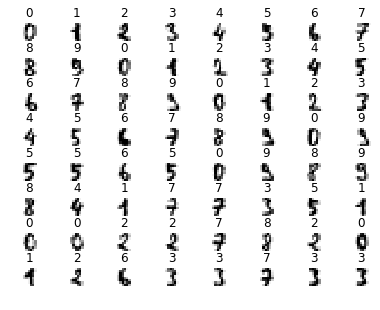

In [4]:
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis("off")
    plt.title(str(digits.target[i]))
    
plt.subplots_adjust(top=0.92, bottom=0.008, left=0.10, right=0.95, hspace=1,
                    wspace=0.35)
plt.show() 

Barajamos el dataset y lo dividimos en train y en test, además de escalar las features

In [5]:
X,y = digits.data, digits.target
shuffle_idx = np.random.permutation(X.shape[0])
X,y = X[shuffle_idx], y[shuffle_idx]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=43)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
print("X Shape: ", X.shape, "y Shape: ", y.shape)
print("X_train Shape: ", X_train.shape, "y_train Shape: ", y_train.shape)
print("X_test Shape: ", X_test.shape, "y_test Shape: ", y_test.shape)

X Shape:  (1797, 64) y Shape:  (1797,)
X_train Shape:  (1437, 64) y_train Shape:  (1437,)
X_test Shape:  (360, 64) y_test Shape:  (360,)


Primero vamos a probar un clasificador binario donde diferencia los números pares de los impares

In [6]:
y_train_binary = (y_train%2==0)
y_test_binary = (y_test%2==0)
binary_clf = SGDClassifier(max_iter=5, tol=None)
binary_clf.fit(X_train,y_train_binary)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

Observamos que obtenemos una accuracy de un ~ 90% en validación cruzada. Vamos a mostrar métricas más utiles para clasificación, es decir, precisión, recall, f1 y la matriz de confusión

In [7]:
cross_val_score(binary_clf, X_train, y_train_binary, cv=3)

array([ 0.83298539,  0.93319415,  0.89352818])

Precisión: 0.871468926554
Recall 0.908689248895
F1_score 0.889689978371
Matriz de confusión
 [[667  91]
 [ 62 617]]


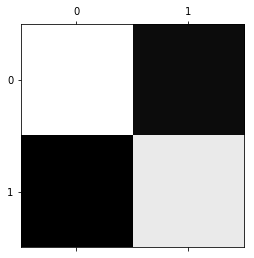

In [8]:
y_train_pred = cross_val_predict(binary_clf,X_train, y_train_binary, cv=3)
precision = precision_score(y_train_pred, y_train_binary)
recall = recall_score(y_train_pred, y_train_binary)
f1 = f1_score(y_train_pred,y_train_binary)
cm = confusion_matrix(y_train_pred, y_train_binary)
print("Precisión:", precision)
print("Recall", recall)
print("F1_score", f1)
print("Matriz de confusión\n", cm)
y_scores = cross_val_predict(binary_clf, X_train, y_train_binary, cv=5, method="decision_function")
plt.matshow(cm,cmap="gray")

Vamos a presentar ahora el equilibrio existente entre precisión y recall

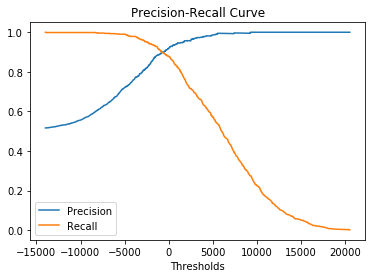

In [9]:
precisions, recalls, thresholds = precision_recall_curve(y_train_binary, y_scores[:,1])
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Thresholds")
plt.legend()
plt.title("Precision-Recall Curve")
plt.show()

Mostramos directamente la precisión contra el recall

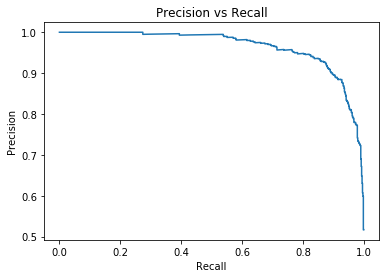

In [10]:
plt.plot(recalls,precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs Recall")
plt.show()

Vamos a mostrar la curva ROC, en azul el clasificador que hemos entrado y en naranja un clasificador que calisifica aleatoriamente. Por último mostramos el area bajo la curva (0.94)

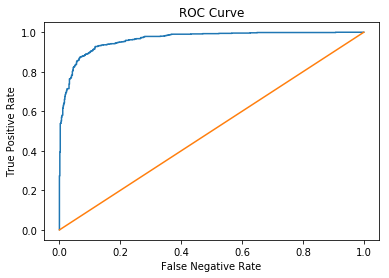

0.96411286260104012

In [11]:
fpr, tpr, thresholds = roc_curve(y_train_binary, y_scores[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel("False Negative Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

roc_auc_score(y_train_binary, y_scores[:,1])

Solamente por motivos de comparación vamos a entrenar un RandomForest y vamos a hacer una gráfica del area bajo la curva que obtenemos con este clasificador y con el clasificador de gradiente descendiente estocástico.

In [12]:
binary_rf = RandomForestClassifier()
cross_val_score(binary_rf, X_train, y_train_binary, cv=5)

array([ 0.95833333,  0.97222222,  0.95833333,  0.94076655,  0.95104895])

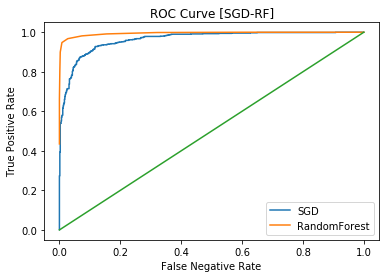

0.9948995605775266

In [13]:
y_scores = cross_val_predict(binary_rf, X_train, y_train_binary, cv=5, method="predict_proba")
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train_binary, y_scores[:,1])
plt.plot(fpr,tpr, label="SGD")
plt.plot(fpr_rf,tpr_rf, label="RandomForest")
plt.plot([0,1],[0,1])
plt.xlabel("False Negative Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve [SGD-RF]")
plt.legend()
plt.show()

roc_auc_score(y_train_binary, y_scores[:,1])

In [14]:
predicted = binary_clf.predict([X_test[9]])
print("¿{} es par? {}".format(y_test[9],predicted[0]))


¿9 es par? False


Vamos a realizar ahora una clasificación multiclase. Anteriormente nos hemos centrado en precedir si el número es par o impar, ahora vamos a tratar de predecir la clase a la que pertenece, esto es si la imagen representa un 8 nos debería devolver un 8

In [15]:
clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(X_train,y_train)
cross_val_score(clf,X_train, y_train, cv=5)

array([ 0.95547945,  0.95138889,  0.95833333,  0.8989547 ,  0.87943262])

In [16]:
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=5)
cm = confusion_matrix(y_train_pred, y_train)
cm

array([[133,   0,   0,   0,   1,   0,   1,   0,   0,   0],
       [  1, 144,   2,   0,   3,   5,   5,   1,  10,   7],
       [  0,   1, 136,   1,   0,   1,   0,   0,   1,   0],
       [  0,   3,   1, 140,   0,   0,   0,   2,   3,   5],
       [  1,   1,   0,   0, 140,   0,   0,   1,   0,   2],
       [  0,   0,   0,   2,   0, 135,   0,   0,   2,   2],
       [  0,   2,   0,   0,   0,   1, 137,   0,   1,   0],
       [  1,   0,   0,   1,   1,   1,   0, 127,   1,   1],
       [  0,   2,   0,   1,   2,   0,   1,   1, 122,   9],
       [  0,   1,   0,   1,   1,   1,   0,   2,   1, 125]])

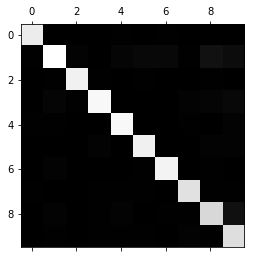

In [17]:
plt.matshow(cm, cmap="gray")
plt.show()

Vamos a precedir la etiqueta de un ejemplo del conjunto de test. concretamente vamos a coger la segunda muestra y al dibujarla en pantalla podemos observar que la clase es un 3 y efectivamente el clasificador la clasifica como 3.

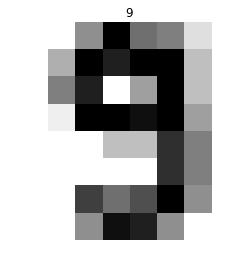

In [18]:
plt.imshow(X_test[9].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.axis("off")
plt.title(str(y_test[9]))
plt.show() 

In [19]:
predicted = clf.predict([X_test[9]])
print("¿{} es igual a {}? {}".format(predicted[0], y_test[9], predicted==y_test[9]))

¿9 es igual a 9? [ True]


Vamos a imprimir las metricas tanto para el clasificador multiclase basado en SGD como en RandomForest

In [20]:
y_pred = clf.predict(X_test)
precision = precision_score(y_pred, y_test, average=None)
recall = recall_score(y_pred, y_test, average=None)
f1 = f1_score(y_pred, y_test, average=None)
print("Precisión para cada una de las clases:\n", precision)
print("Recall para cada una de las clases:\n", recall)
print("Puntuación f1 para cada una de las clases:\n", f1)
print("Precision media", precision.mean())
print("Recall medio", recall.mean())
print("Puntuación f1 media", f1.mean())

Precisión para cada una de las clases:
 [ 0.95238095  0.57142857  0.97368421  1.          0.93939394  0.89473684
  1.          0.86666667  0.36363636  0.96551724]
Recall para cada una de las clases:
 [ 1.          1.          0.925       0.64912281  0.73809524  1.
  0.94871795  1.          1.          0.68292683]
Puntuación f1 para cada una de las clases:
 [ 0.97560976  0.72727273  0.94871795  0.78723404  0.82666667  0.94444444
  0.97368421  0.92857143  0.53333333  0.8       ]
Precision media 0.852744478752
Recall medio 0.89438628231
Puntuación f1 media 0.844553455818


In [21]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
cross_val_score(rf,X_train, y_train, cv=3)

array([ 0.94616977,  0.93305439,  0.90336134])

In [22]:
y_pred = rf.predict(X_test)
precision = precision_score(y_pred, y_test, average=None)
recall = recall_score(y_pred, y_test, average=None)
f1 = f1_score(y_pred, y_test, average=None)
print("Precisión para cada una de las clases:\n", precision)
print("Recall para cada una de las clases:\n", recall)
print("Puntuación f1 para cada una de las clases:\n", f1)
print("Precision media", precision.mean())
print("Recall medio", recall.mean())
print("Puntuación f1 media", f1.mean())

Precisión para cada una de las clases:
 [ 0.97619048  1.          0.94736842  0.91891892  0.93939394  0.97368421
  0.94594595  0.95555556  0.84848485  0.93103448]
Recall para cada una de las clases:
 [ 0.97619048  0.84848485  0.97297297  0.94444444  0.91176471  1.
  0.97222222  0.95555556  0.96551724  0.87096774]
Puntuación f1 para cada una de las clases:
 [ 0.97619048  0.91803279  0.96        0.93150685  0.92537313  0.98666667
  0.95890411  0.95555556  0.90322581  0.9       ]
Precision media 0.943657679883
Recall medio 0.941812020907
Puntuación f1 media 0.941545538498
